In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load the dataset (replace 'fraud_data.csv' with the actual path to your dataset)
data = pd.read_csv('C:\Oasis Intern\Fraud Detection\creditcard.csv')

# Display the first few rows of the dataset
print(data.head())

# Basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

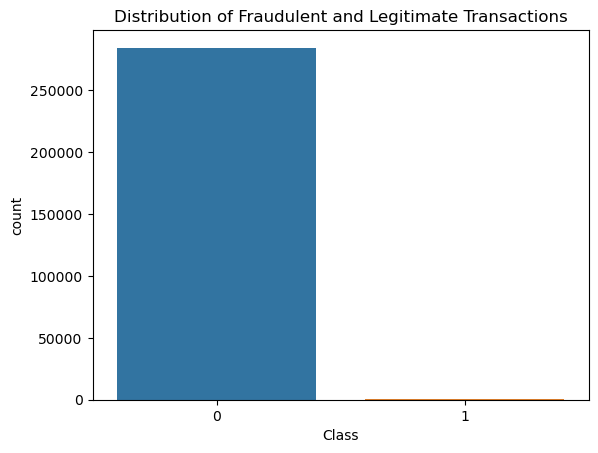

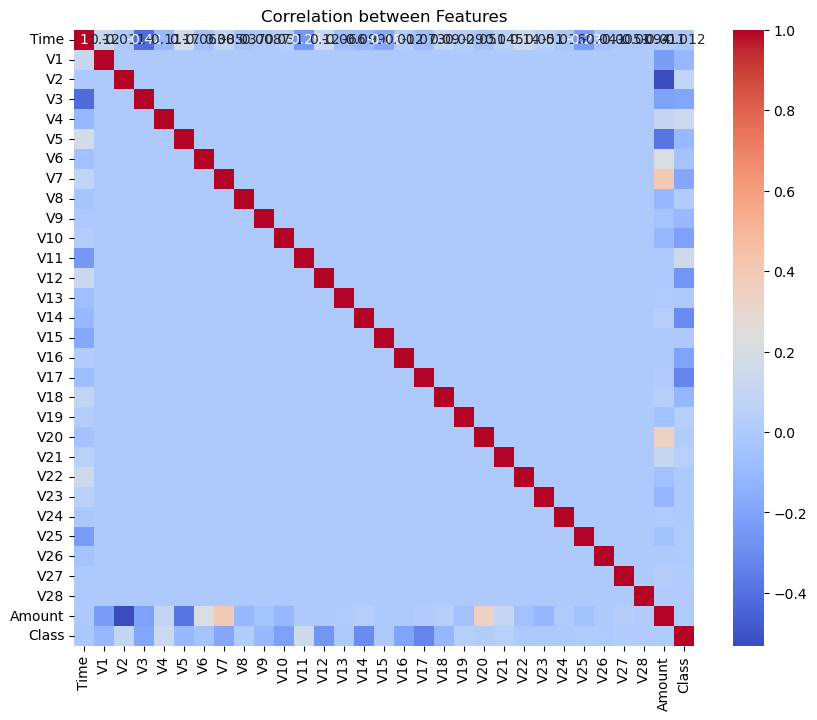

In [17]:
# Visualize the distribution of classes (fraudulent vs. legitimate)
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent and Legitimate Transactions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


In [21]:
# Defining features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predicting on the test set
log_reg_predictions = log_reg_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions, zero_division=0))
print(confusion_matrix(y_test, log_reg_predictions))


Logistic Regression Accuracy: 0.9991748885221726
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56851    13]
 [   34    64]]


In [25]:
# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predicting on the test set
tree_predictions = tree_model.predict(X_test)

# Evaluating the model
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions, zero_division=0))
print(confusion_matrix(y_test, tree_predictions))


Decision Tree Accuracy: 0.9991397773954567
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56840    24]
 [   25    73]]


In [27]:
# Initialize and train the Neural Network model
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train, y_train)

# Predicting on the test set
nn_predictions = nn_model.predict(X_test)

# Evaluating the model
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))
print(classification_report(y_test, nn_predictions, zero_division=0))
print(confusion_matrix(y_test, nn_predictions))


Neural Network Accuracy: 0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.82      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56852    12]
 [   18    80]]


Logistic Regression Accuracy: 0.9991748885221726
Decision Tree Accuracy: 0.9991397773954567
Neural Network Accuracy: 0.9994733330992591


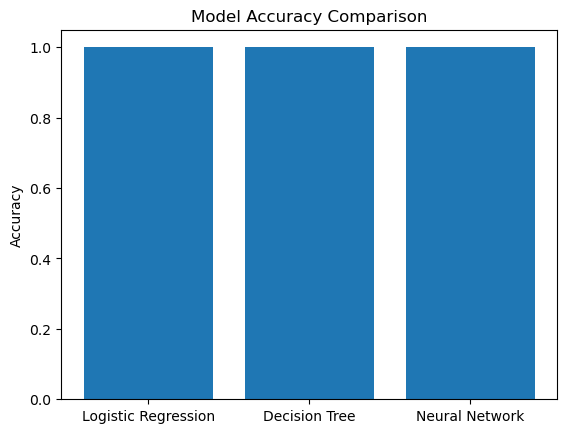

In [29]:
# Compare accuracy scores
log_reg_acc = accuracy_score(y_test, log_reg_predictions)
tree_acc = accuracy_score(y_test, tree_predictions)
nn_acc = accuracy_score(y_test, nn_predictions)

print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"Decision Tree Accuracy: {tree_acc}")
print(f"Neural Network Accuracy: {nn_acc}")

# Visualize the comparison
model_accuracies = {'Logistic Regression': log_reg_acc, 'Decision Tree': tree_acc, 'Neural Network': nn_acc}
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
